# Assignment 1

## Setup: Importing libraries and loading the dataset


In [58]:
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv("../data/swedish_population_by_year_and_sex_1860-2022.csv")
df

,age,sex,1860,1861,1862,1863,1864,1865,1866,1867,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0,men,60589,59797,62371,61515,61931,60998,63036,58645,...,58649,59584,59994,61005,59899,60032,59476,58485,58692,54095
1,0,women,58837,58136,60041,59384,60100,59622,60874,56586,...,55359,56296,55884,58018,56715,56807,55907,55104,55971,51091
2,1,men,56001,54544,52933,55776,57346,57776,57017,59071,...,59039,59489,60640,61352,62531,60973,60993,60058,59195,59411
3,1,women,54833,53762,52282,54500,55823,56641,56263,57539,...,55884,56083,57292,57216,59444,57789,57783,56533,55855,56712
4,2,men,52502,54062,51613,50710,53743,55227,55696,55254,...,58721,59807,60292,61817,62258,63361,61598,61348,60596,59723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,108,women,0,0,0,0,0,0,0,0,...,6,8,5,3,3,10,7,9,4,8
218,109,men,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
219,109,women,0,0,0,0,0,0,0,0,...,4,2,6,3,3,1,6,2,6,1
220,110+,men,0,0,0,0,0,0,0,0,...,1,1,1,1,0,3,0,0,0,0


## Part I: Dependency ratio

Creating a new data frame containing the amount of people of a certain age for each year:

In [60]:
age_df = df.drop(columns='sex').groupby("age").sum()

Generating a support vector with all the ages in the dataset:

In [61]:
age = pd.to_numeric(age_df.index.str.replace("+", ""))

Calculating the amount of children by summing every age under 15 years old:

In [62]:
children_count = age_df[age <= 14].sum()

Doing the same thing for the elderly:

In [63]:
elderly_count = age_df[age >= 65].sum()

And for the labor force:

In [64]:
labor_count = age_df[(age >= 15) & (age <= 64)].sum()

Calculating the dependency ratio as: 
$$\frac{\text{children\_count} + \text{elderly\_count}}{\text{labor\_count}}$$ 

In [65]:
dependent_count = children_count + elderly_count
dependency_ratio = dependent_count / labor_count

Plotting the ratio:

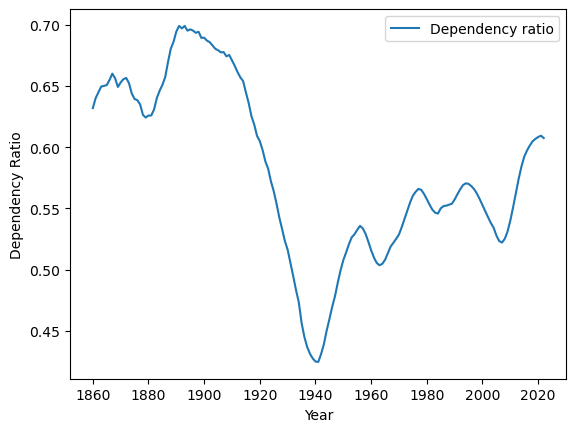

In [66]:
_, ax = plt.subplots()
ax.plot(dependency_ratio, label="Dependency ratio")
ax.set_xlabel('Year')
ax.set_ylabel('Dependency Ratio')
ax.set_xticks(range(0, len(dependency_ratio), 20))
ax.legend()

plt.savefig("dependency_ratio.png")

## Part II: Population fractions

Calculating the total amount of a particular age group relative to the total population:


In [67]:
total_count = age_df.sum()
children_fraction = children_count / total_count
elderly_fraction = elderly_count / total_count
dependent_fraction = dependent_count / total_count

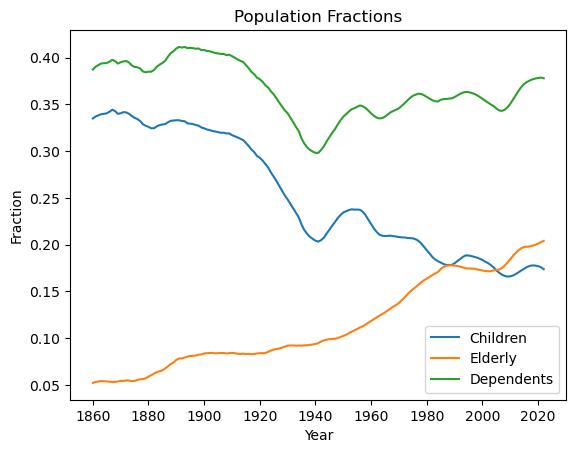

In [68]:
_, ax = plt.subplots()
ax.plot(children_fraction, label="Children")
ax.plot(elderly_fraction, label="Elderly")
ax.plot(dependent_fraction, label="Dependents")
ax.set_title('Population Fractions')
ax.set_xlabel('Year')
ax.set_ylabel('Fraction')
ax.set_xticks(range(0, len(children_fraction), 20))
ax.legend()

plt.savefig("population_fractions.png")